In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [2]:
# File paths
data_dir = "../data/"

users_file = f"{data_dir}fake_users.json"
interactions_file = f"{data_dir}fake_interactions.json"
groups_file = f"{data_dir}fake_groups.json"

# Load data
with open(users_file, "r") as f:
    users = json.load(f)

with open(interactions_file, "r") as f:
    interactions = json.load(f)

with open(groups_file, "r") as f:
    groups = json.load(f)

# Convert to DataFrames
users_df = pd.DataFrame(users)
interactions_df = pd.DataFrame(interactions)
groups_df = pd.DataFrame(groups)

# Display first few rows
users_df.head(), interactions_df.head(), groups_df.head()


(   id              name                          email  \
 0   0  Jessica Sullivan      rothelizabeth@example.net   
 1   1   Anthony Goodman      dustinandrews@example.com   
 2   2      Bryan Hudson  camposchristopher@example.com   
 3   3      Gabriel Cruz          ewilliams@example.net   
 4   4   Thomas Gonzalez          xanderson@example.com   
 
                                                  bio  \
 0  Dream military feel despite career.\nFeeling i...   
 1  Which no believe audience.\nDesign back expert...   
 2  Throughout military offer impact travel strate...   
 3  Lead just sing cultural. Area suggest long lev...   
 4  Well though trial.\nBuy those employee head vi...   
 
                    profile_picture         location  \
 0  https://placekitten.com/780/760    Angelicamouth   
 1  https://placekitten.com/227/152  New Ericchester   
 2      https://picsum.photos/351/0  Benjaminborough   
 3     https://picsum.photos/10/768     Jenniferport   
 4    https://picsum

In [3]:
# File paths
data_dir = "../data/"

users_file = f"{data_dir}fake_users.json"
interactions_file = f"{data_dir}fake_interactions.json"
groups_file = f"{data_dir}fake_groups.json"

# Load data
with open(users_file, "r") as f:
    users = json.load(f)

with open(interactions_file, "r") as f:
    interactions = json.load(f)

with open(groups_file, "r") as f:
    groups = json.load(f)

# Convert to DataFrames
users_df = pd.DataFrame(users)
interactions_df = pd.DataFrame(interactions)
groups_df = pd.DataFrame(groups)

# Display first few rows
users_df.head(), interactions_df.head(), groups_df.head()


(   id              name                          email  \
 0   0  Jessica Sullivan      rothelizabeth@example.net   
 1   1   Anthony Goodman      dustinandrews@example.com   
 2   2      Bryan Hudson  camposchristopher@example.com   
 3   3      Gabriel Cruz          ewilliams@example.net   
 4   4   Thomas Gonzalez          xanderson@example.com   
 
                                                  bio  \
 0  Dream military feel despite career.\nFeeling i...   
 1  Which no believe audience.\nDesign back expert...   
 2  Throughout military offer impact travel strate...   
 3  Lead just sing cultural. Area suggest long lev...   
 4  Well though trial.\nBuy those employee head vi...   
 
                    profile_picture         location  \
 0  https://placekitten.com/780/760    Angelicamouth   
 1  https://placekitten.com/227/152  New Ericchester   
 2      https://picsum.photos/351/0  Benjaminborough   
 3     https://picsum.photos/10/768     Jenniferport   
 4    https://picsum

In [4]:
# Validate interaction user IDs
user_ids = set(users_df["id"])
interaction_user_ids = set(interactions_df["user1"]).union(set(interactions_df["user2"]))
print("\nUsers in Interactions Valid:", interaction_user_ids.issubset(user_ids))

# Validate group member IDs
group_user_ids = set(groups_df.explode("members")["members"])
print("Users in Groups Valid:", group_user_ids.issubset(user_ids))



Users in Interactions Valid: True
Users in Groups Valid: True


C:\Users\krishkum\AppData\Local\Temp\ipykernel_22924\3675641957.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


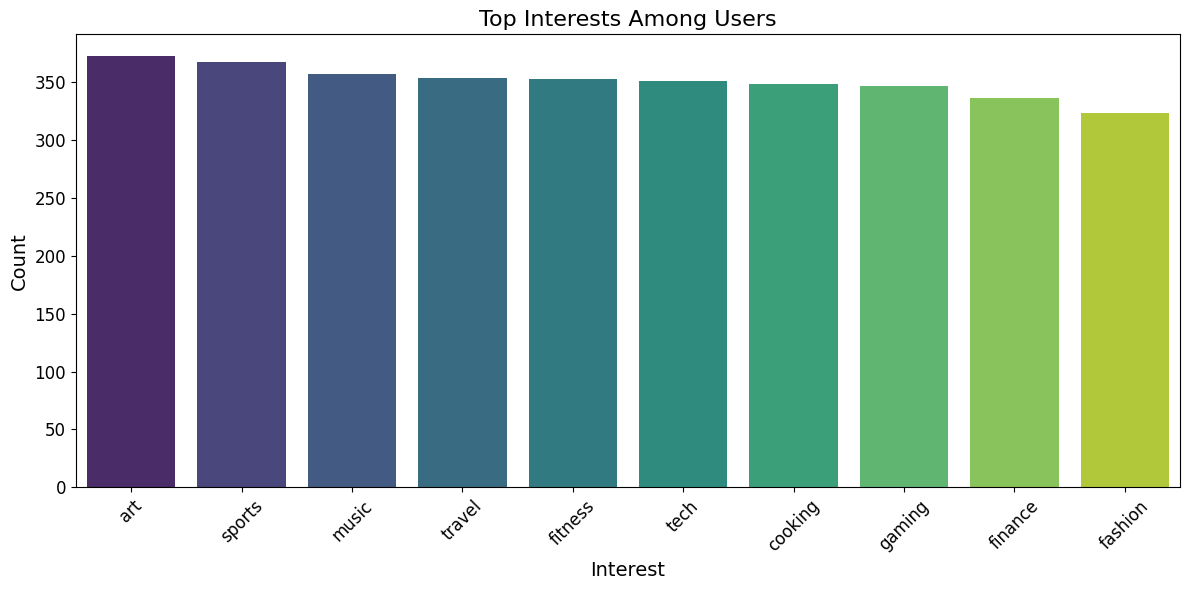

C:\Users\krishkum\AppData\Local\Temp\ipykernel_22924\3675641957.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


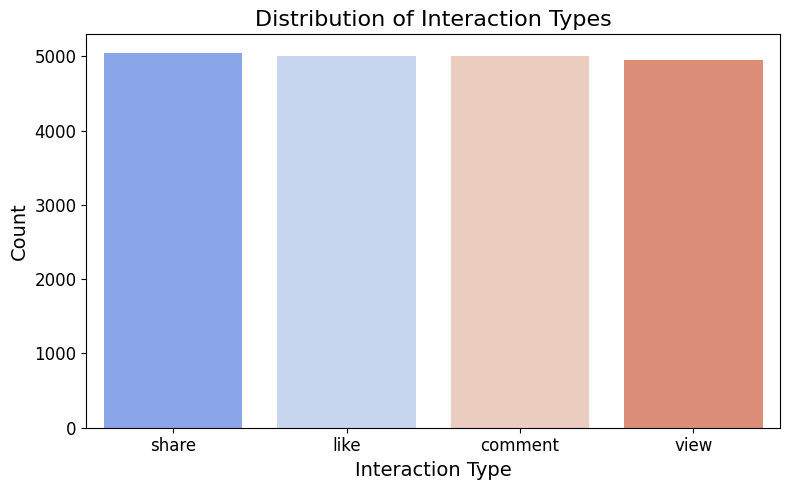

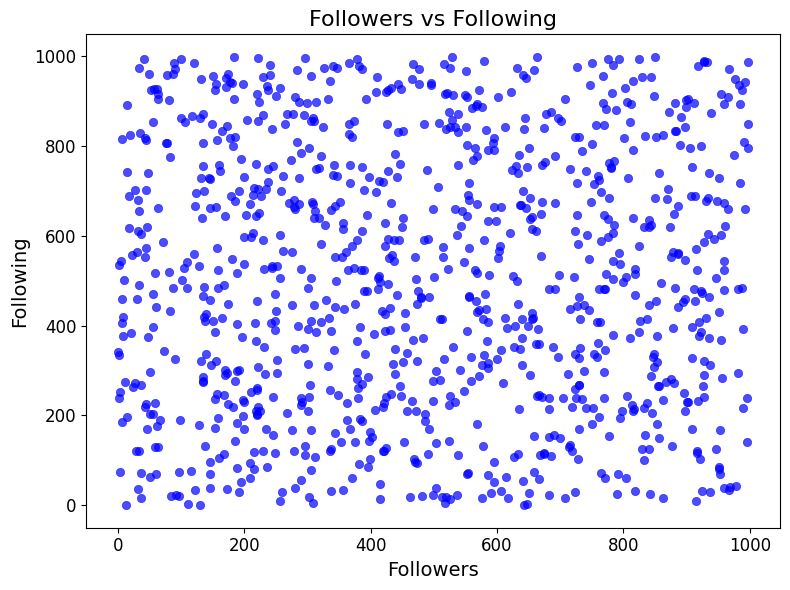

In [6]:
unique_interests = users_df.explode("interests")["interests"].value_counts()

# 1. Interest distribution
plt.figure(figsize=(12, 6))
sns.barplot(
    x=unique_interests.index[:10],  # Display top 10 interests
    y=unique_interests.values[:10],
    palette="viridis"
)
plt.title("Top Interests Among Users", fontsize=16)
plt.xlabel("Interest", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 2. Interaction type distribution
plt.figure(figsize=(8, 5))
sns.countplot(
    x="interaction_type",
    data=interactions_df,
    palette="coolwarm",
    order=interactions_df["interaction_type"].value_counts().index,  # Order by frequency
)
plt.title("Distribution of Interaction Types", fontsize=16)
plt.xlabel("Interaction Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 3. Followers vs. Following distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="followers",
    y="following",
    data=users_df,
    alpha=0.7,
    edgecolor=None,
    color="blue"
)
plt.title("Followers vs Following", fontsize=16)
plt.xlabel("Followers", fontsize=14)
plt.ylabel("Following", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
print("Number of fake groups:", len(groups_df))
print("Number of fake interactions:", len(interactions_df))
print("Number of fake users:", len(users_df))

Number of fake groups: 100
Number of fake interactions: 20000
Number of fake users: 1000
